<div align="center">

# Avocado Project

</div>

## project overview

__Project Description:__

The Avocado Project involves the analysis of weekly retail scan data for Hass avocados in 2018. The data, downloaded from the Hass Avocado Board website and compiled into a single CSV, provides insights into the National retail volume (units) and price of avocados. The dataset is based on actual retail sales data, sourced directly from retailers' cash registers, and spans multiple outlets including grocery, mass, club, drug, dollar, and military channels.

The relevant columns in the dataset include:

1. Date: The date of the observation.
2. AveragePrice: The average price of a single avocado.
3. Type: Indicates whether the avocado is conventional or organic.
4. Year: The year of the observation.
5. Region: The city or region of the observation.
6. Total Volume: Total number of avocados sold.
7. 4046, 4225, 4770: Total number of avocados sold with specific PLU codes.

The dataset focuses exclusively on Hass avocados, with other varieties excluded. The Average Price is given on a per-unit basis, even when avocados are sold in bags.

__Project Tasks:__

___Classification Task:___
The first task involves classification to predict the 'Type' of avocados, i.e., whether they are conventional or organic. This task helps identify the classification pattern based on features such as Average Price, Total Volume, and PLU codes. A Random Forest Classifier is employed for this classification.

____Regression Task:___
The second task is a regression analysis aimed at predicting the 'AveragePrice' of avocados. Utilizing features like Total Volume, PLU codes, and encoded Type, a Random Forest Regressor is applied to estimate the average price. This regression task provides insights into the factors influencing avocado prices.

__Dataset Link:__
https://github.com/dsrscientist/Data-Science-ML-Capstone- 

__Summary__
Discuss the implications and potential use cases based on the classification and regression results.
By combining classification and regression tasks, the Avocado Project aims to provide a comprehensive understanding of the avocado market, encompassing both the type classification and price prediction aspects.

## Imports

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
file_path = "C:/Users/Mahima/Downloads/avocado.csv.zip"
df = pd.read_csv(file_path, compression='zip')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.duplicated().sum() 

0

<Axes: >

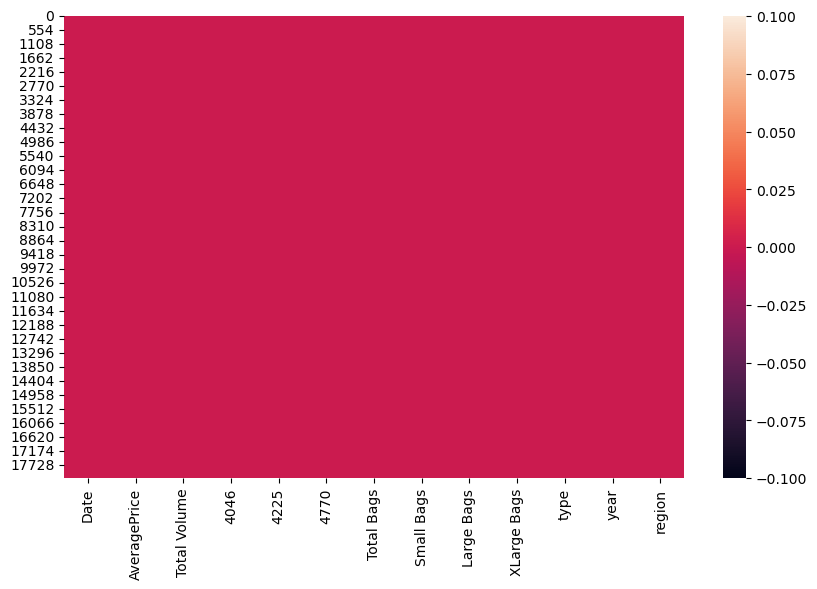

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [8]:
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Dataset doesn't contain Any Duplicate Entry or Missing Values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


__Key Takeaways__
- There are 13 features in the dataset.
- 'Region' has an object datatype.
- The 'Date' column, by default, has an object datatype which needs to be changed to datetime datatype.
- Other variables have float and int datatypes. We will correct if there are any errors.

In [10]:
# Converting datatype of date column
df['Date']=pd.to_datetime(df.Date)

In [11]:
df['Date'].dtype

dtype('<M8[ns]')

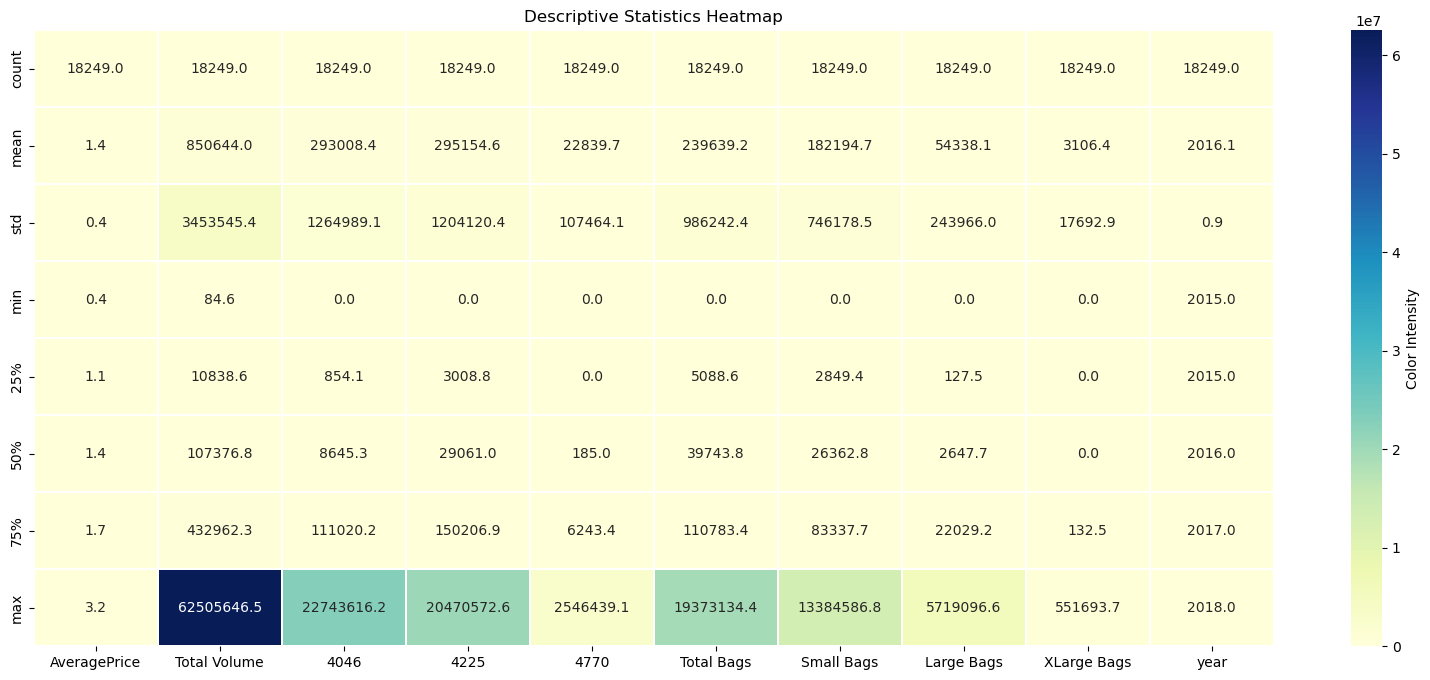

In [12]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.describe(), linewidths=0.1, fmt='0.1f', annot=True, cmap='YlGnBu', cbar_kws={'label': 'Color Intensity'})
plt.title('Descriptive Statistics Heatmap')
plt.show()

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


1. Outliers Suspected: A closer look at the 50% and max columns suggests the possible presence of outliers in some features.
2. Presence of Zero Values: Many columns exhibit a minimum value of zero, indicating the occurrence of zero values in the dataset.
3. Right-Skewed Distribution: Across most columns, the mean surpasses the median, indicative of a right-skewed distribution.
4. Data Spread: Notably, for the majority of columns, the standard deviation exceeds the mean, signifying a considerable spread in the data.

In [14]:
print("\033[1m"+'Minimum Price of Avocado :'+"\033[0m",df.AveragePrice.min(),'USD')
print("\033[1m"+'Maximum Price of avacado :'+"\033[0m",df.AveragePrice.max(),'USD')
print("\033[1m"+'Average Price of avacado :'+"\033[0m",df.AveragePrice.mean(),'USD')

Minimum Price of Avocado : 0.44 USD
Maximum Price of avacado : 3.25 USD
Average Price of avacado : 1.405978409775878 USD


**Price Analysis Comment:**
1. Minimum Price of Avocado: $0.44 USD

- Indicates instances of avocados being available at a relatively low cost.
2. Maximum Price of Avocado: $3.25 USD

- Suggests instances of higher-priced avocados, potentially during periods of increased demand or specific market conditions.
3. Average Price of Avocado: $1.41 USD

- Represents the typical cost of avocados across all observations.

4. Overall Insights:
- The dataset displays a diverse range of avocado prices.
- Analysis provides insights into the variability and distribution of avocado prices in the dataset.

<Axes: title={'center': 'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

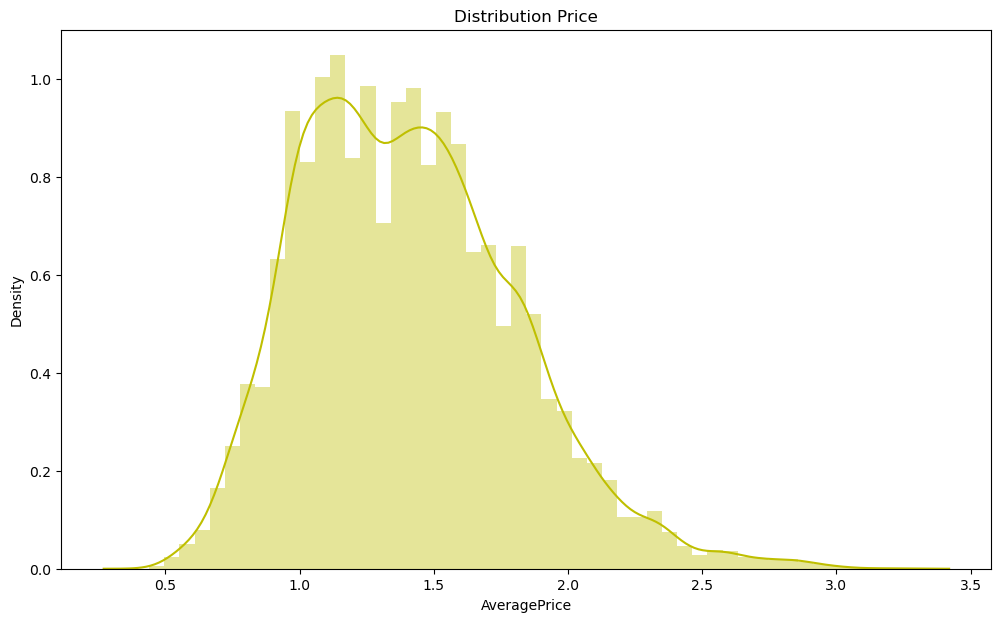

In [15]:
plt.figure(figsize=(12,7))
plt.title('Distribution Price')
sns.distplot(df["AveragePrice"], color='y')

__Average Price Variation Comment:__

- In the majority of cases, the average price of avocados exhibits variation, typically falling within the range of 1.1 to 1.6 USD per unit.
- This range suggests a consistent but diverse pricing pattern, highlighting fluctuations in avocado costs across different observations.

In [16]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [17]:
df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [18]:
print("\033[1m"+'Difference in price of Avocados (%) :'+"\033[0m",((1.65399-1.1580)/1.1580)*100,"%")

Difference in price of Avocados (%) : 42.831606217616596 %


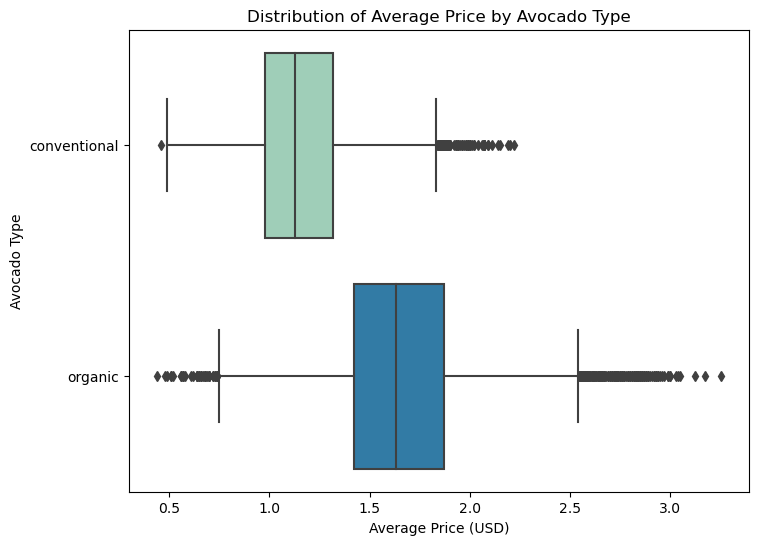

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(y="type", x="AveragePrice", data=df, palette='YlGnBu')
plt.xlabel('Average Price (USD)')
plt.ylabel('Avocado Type')
plt.title('Distribution of Average Price by Avocado Type')
plt.show()

**Average Price Comparison Comment:**
- Organic Avocado is observed to be almost 43% more expensive than Conventional Avocado.
- The boxplot clearly depicts that the Average Price of Organic Avocado consistently exceeds that of Conventional Avocado.
- This observation aligns with expectations, given that the cultivation of organic avocados is recognized as an expensive and time-consuming process, demanding substantial effort and patience.
- Health-conscious and quality-oriented consumers often show a willingness to pay a premium for organic produce, contributing to the higher average prices observed in this dataset.
- The visual representation of the boxplot effectively emphasizes the significant cost difference between Organic and Conventional Avocado, providing valuable insights into consumer preferences and market dynamics.

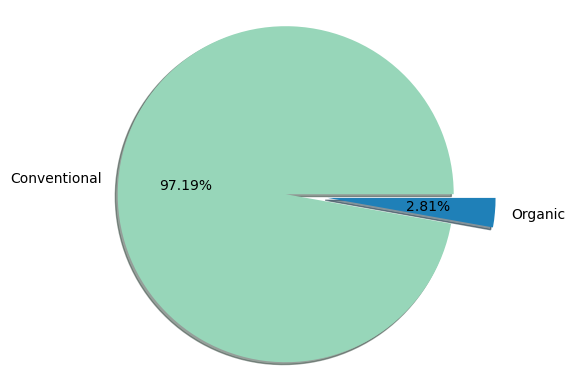

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
labels = 'Conventional', 'Organic'
sizes = df.groupby('type')['Total Volume'].mean()

# Plotting
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, radius=2, autopct='%2.2f%%', explode=[0.3, 0.2], shadow=True,
       colors=sns.color_palette("YlGnBu", n_colors=len(labels)))

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Display the plot
plt.show()

In [21]:
df.groupby('type')['Total Volume'].mean()

type
conventional    1.653213e+06
organic         4.781121e+04
Name: Total Volume, dtype: float64

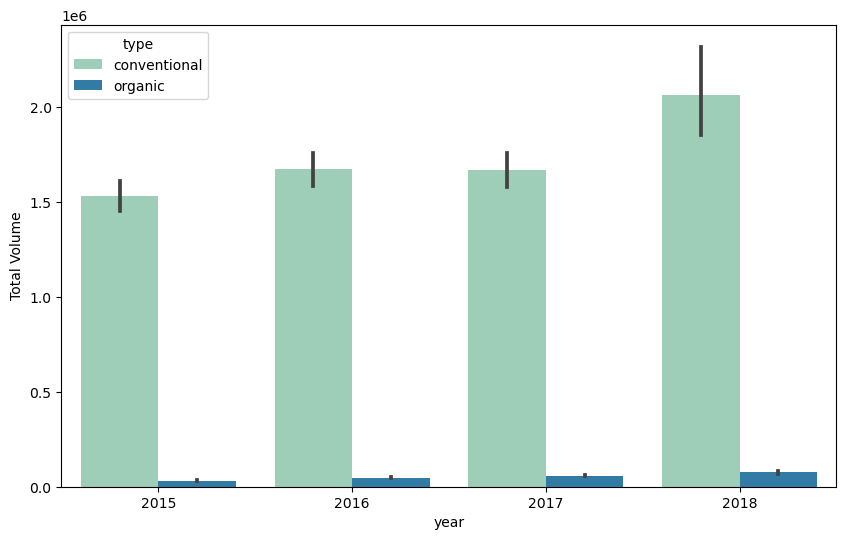

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Total Volume', hue='type',data=df, palette='YlGnBu',ci=68)
plt.show()

**Sales Volume Comparison Comment:**
- The sale of organic avocados is observed to be less than 3% of the total volume, indicating a smaller market share.
- Conventional avocados, on the other hand, dominate the market and are evidently in higher demand.
- This observation is confirmed by a bar plot depicting year-wise sales volume, where the dominance of Conventional Avocado sales is visually evident.
- The clear contrast in sales volume between Conventional and Organic Avocado emphasizes the popularity and higher market demand for Conventional Avocados across the years.

In [23]:
# Lets analyse how the Average price changes in accordance with Year and seasons. 
df.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

**Price Comparison Comment:**
- Organic Avocado is consistently 40-50% costlier than Conventional Avocado, indicating a substantial premium for the organic variety.
- Avocado prices experienced a significant hike in the year 2017, possibly due to reasons such as inflation, shortage, or increased wages.
- Except for the anomaly in 2017, there is a consistent annual increase in the price of avocados, suggesting a general upward trend.
- These observations provide insights into the cost dynamics of avocados, with a notable price differential between organic and conventional types and a specific price spike in the year 2017.

In [24]:
# Demand Trend Analysis
df.groupby(['year','type'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([sum])

Total Volume    Total Bags    Small Bags    Large Bags  \
                            sum           sum           sum           sum   
year type                                                                   
2015 conventional  4.296599e+09  7.481009e+08  6.194886e+08  1.231692e+08   
     organic       8.886943e+07  2.409134e+07  1.519414e+07  8.897192e+06   
2016 conventional  4.690250e+09  1.398101e+09  1.064426e+09  3.136371e+08   
     organic       1.306401e+08  6.505765e+07  4.206845e+07  2.298920e+07   
2017 conventional  4.766166e+09  1.541193e+09  1.145835e+09  3.713655e+08   
     organic       1.681399e+08  1.050962e+08  7.711715e+07  2.797352e+07   
2018 conventional  1.334206e+09  4.593696e+08  3.344334e+08  1.177311e+08   
     organic       4.853227e+07  3.216630e+07  2.630799e+07  5.852903e+06   

                   XLarge Bags  
                           sum  
year type                       
2015 conventional   5443128.28  
     organic              0.00  
2016 conventional  20038284.84  
     organic              0.00  
2017 conventional  23991658.41  
     organic           5513.93  
2018 conventional   7205184.07  
     organic           5407.80

**Demand and Sales Analysis:**
- The sales of avocados in 2017 surpassing those in 2016 suggests a potential correlation between the price hike and an increase in demand or possible supply chain issues during that period.
- The overall trend indicates a consistent growth in avocado sales over time, implying an increasing demand for this popular fruit.
- Notably, there is a remarkable 30% increase in the sale of organic avocados in 2017 compared to 2016, despite being almost 50% costlier than the conventional type. This could be indicative of a growing preference for healthier options among consumers.
- While there is also a growth in demand for conventional avocados year-wise, the rate of growth is comparatively less than that observed for organic avocados. This trend could be attributed to a rising health-conscious consumer base.
- The rapid increase in sales of XLarge bags in 2017 compared to 2015 suggests a shift in consumer preferences, possibly influenced by factors such as bulk discounts or promotional offers.
- Examining the trend from 2015, there is a noticeable shift in customer behavior towards buying larger bags (Large or XLarge) compared to small bags, especially in the case of Conventional avocados. This shift may be influenced by quantity discounts or promotional strategies implemented by retailers.
- The observation that people tend to choose small bags of organic avocados over large ones suggests that price considerations may play a significant role in purchasing decisions, highlighting the importance of pricing strategies in the organic avocado market.

In [25]:
df.sort_values(by=['Date'], inplace=True, ascending=True)

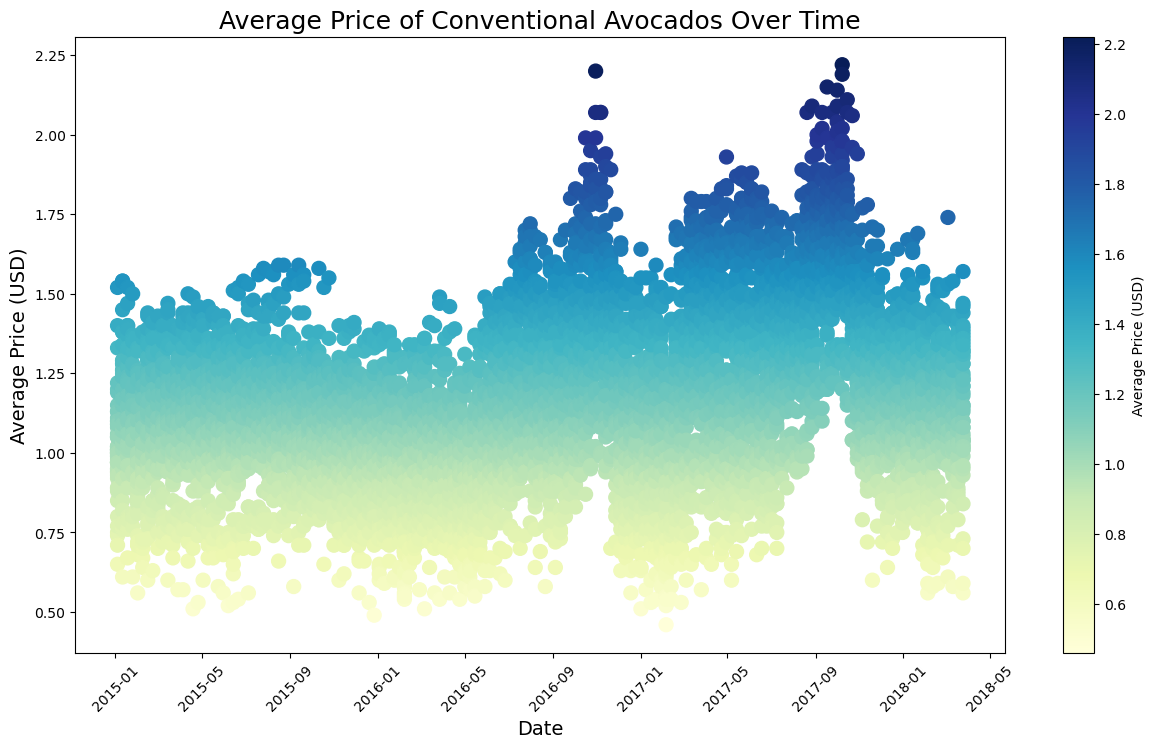

In [26]:
mask = df['type'] == 'conventional'
conventional_data = df[mask]

sns.set_palette("YlGnBu")
plt.figure(figsize=(15, 8))
plt.scatter(conventional_data['Date'], conventional_data['AveragePrice'], c=conventional_data['AveragePrice'], cmap='YlGnBu', s=100)
plt.title('Average Price of Conventional Avocados Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Price (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.colorbar(label='Average Price (USD)')
plt.show()

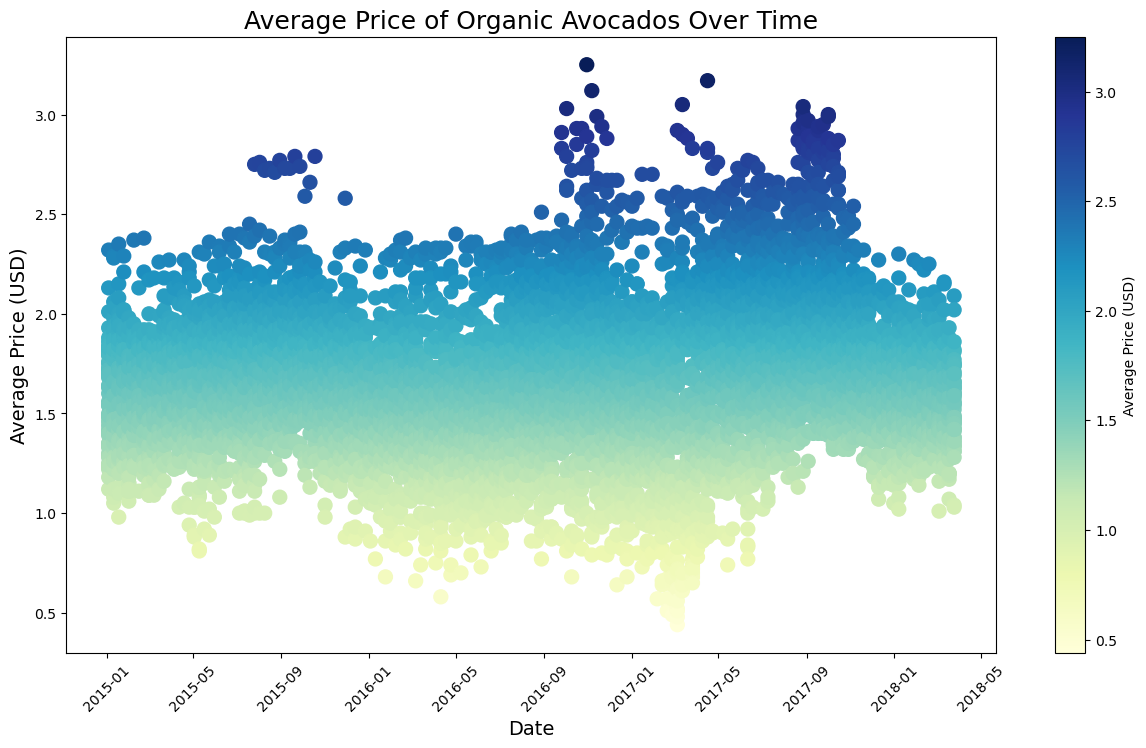

In [27]:
mask_organic = df['type'] == 'organic'
organic_data = df[mask_organic]

sns.set_palette("YlGnBu")
plt.figure(figsize=(15, 8))
plt.scatter(organic_data['Date'], organic_data['AveragePrice'], c=organic_data['AveragePrice'], cmap='YlGnBu', s=100)
plt.title('Average Price of Organic Avocados Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Price (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.colorbar(label='Average Price (USD)')
plt.show()

In [28]:
df.groupby(['region'])['Total Volume','AveragePrice'].agg([sum])

,Total Volume,AveragePrice
,sum,sum
region,,
Albany,1.606780e+07,527.63
Atlanta,8.860512e+07,452.23
BaltimoreWashington,1.347139e+08,518.57
Boise,1.441319e+07,455.67
Boston,9.727398e+07,517.44
BuffaloRochester,2.296247e+07,512.69
California,1.028982e+09,471.62
Charlotte,3.555554e+07,542.84


## EDA

In [29]:
df2=df.copy()

In [30]:
# Creating Datframe for numeric features
df2.drop(['Date','type','region','year'], axis=1, inplace=True)

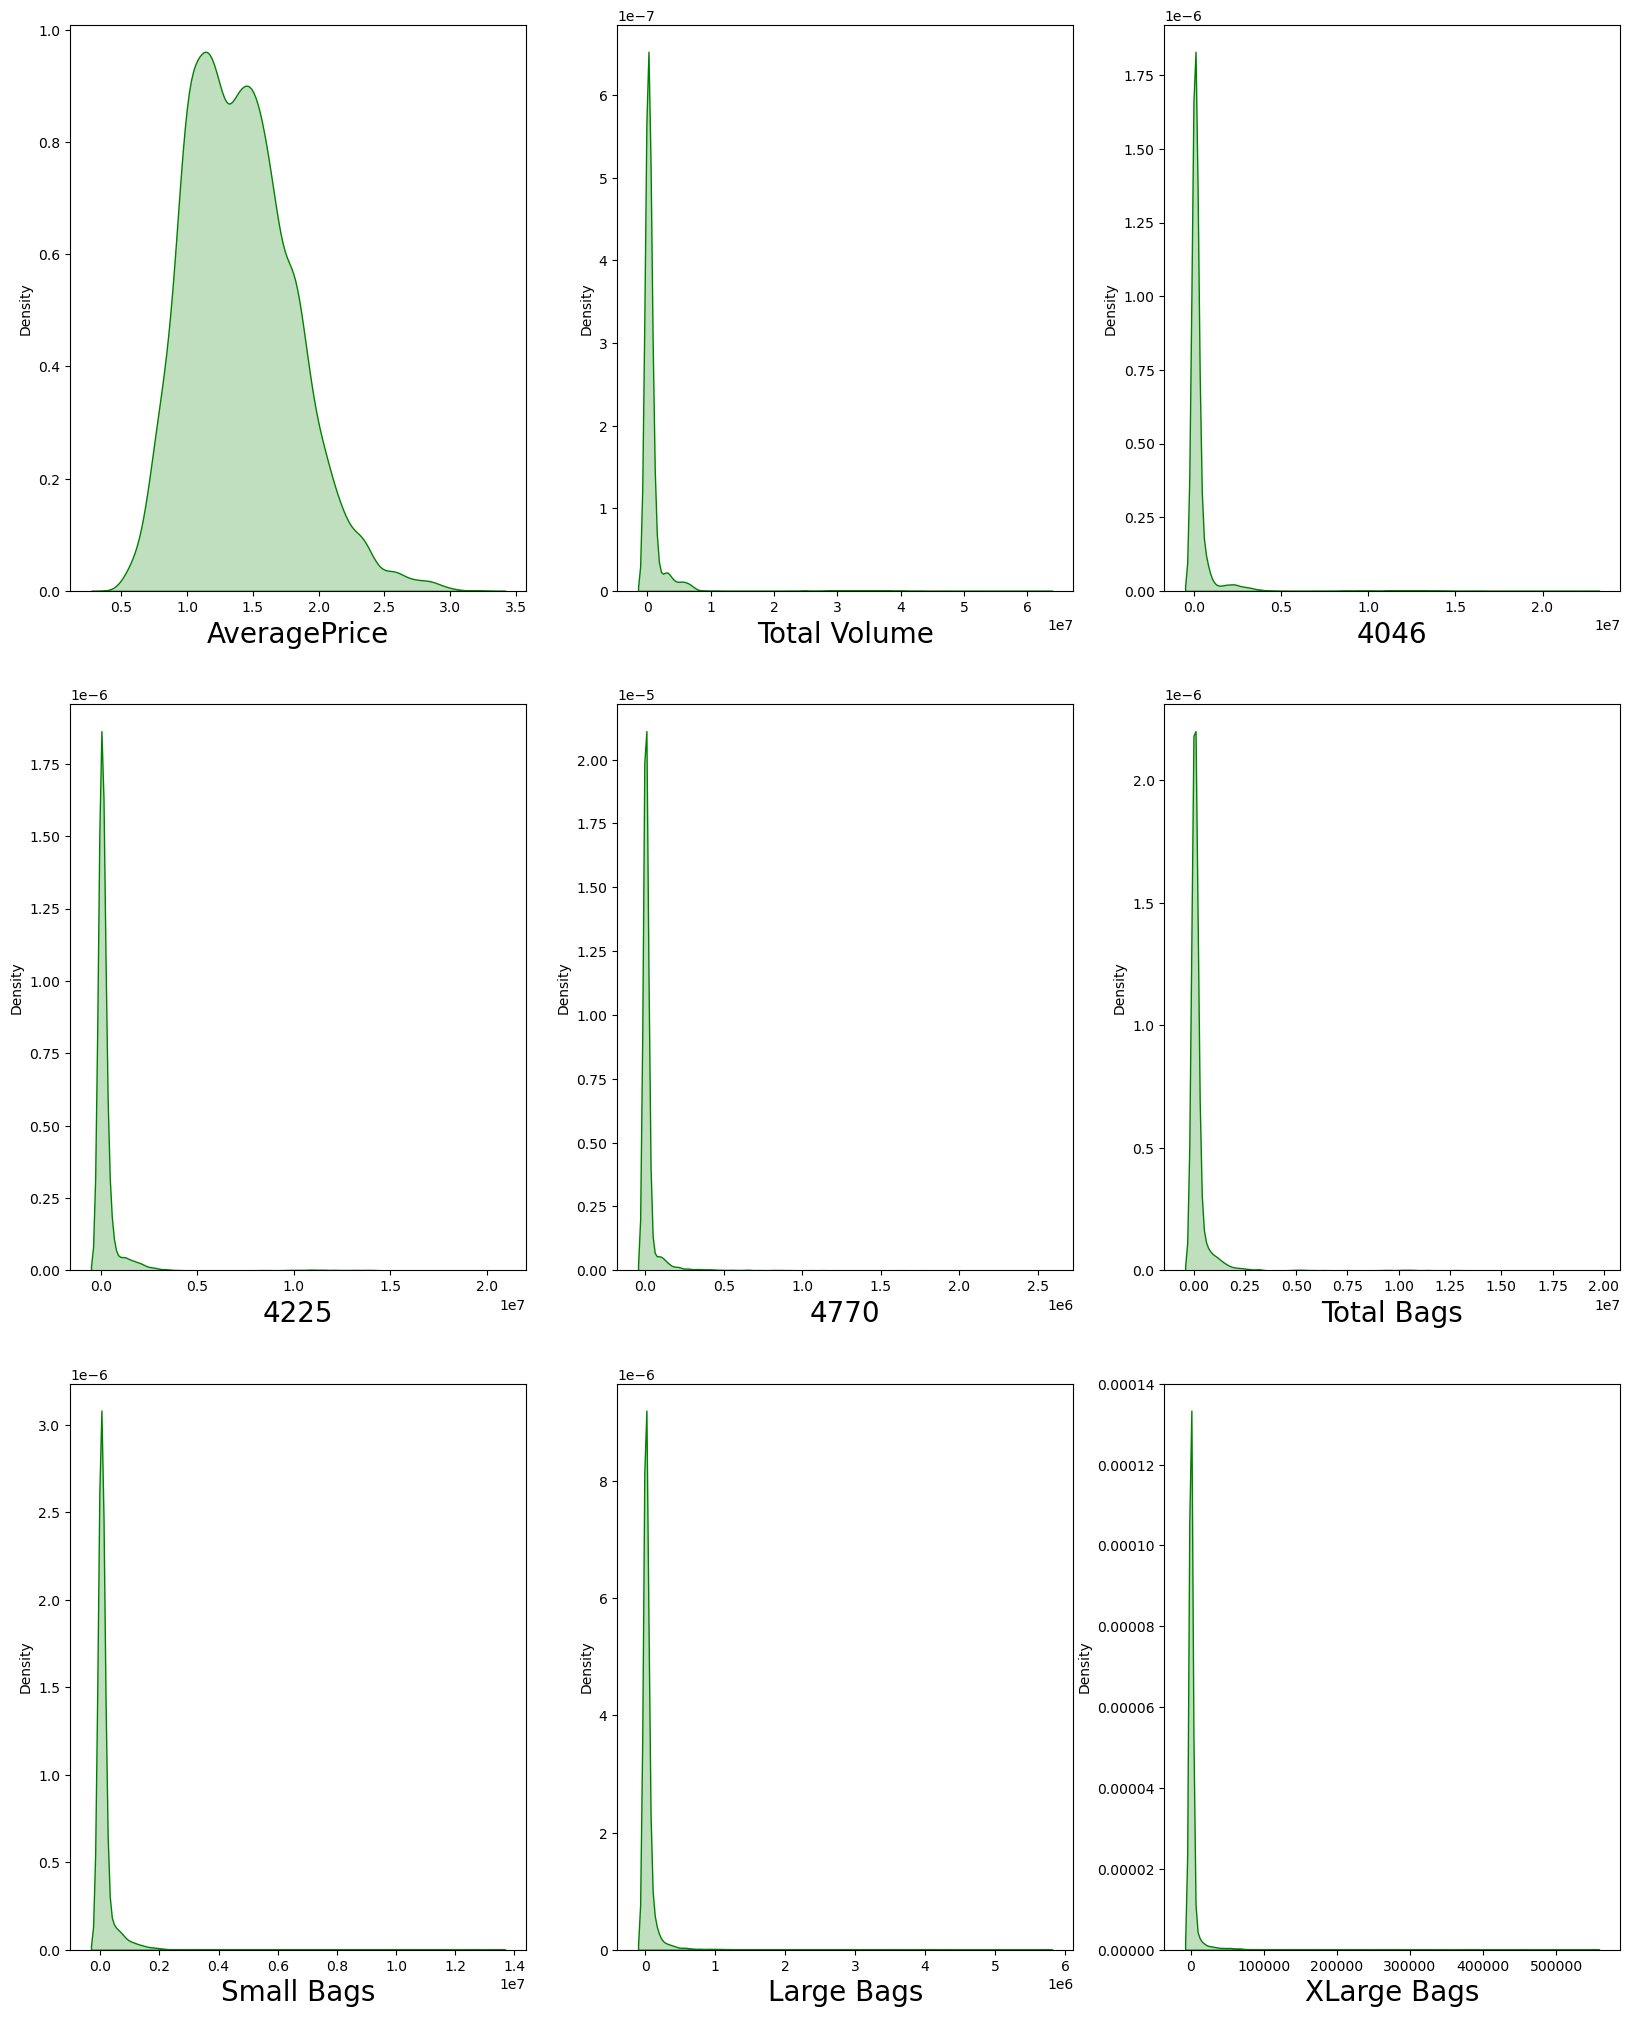

In [31]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df2[column], color='g',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**Data Distribution Comment:**
- The visual examination of the plots indicates a skewed distribution with the presence of outliers, resulting in a sharp peak.
- Most of the plots exhibit a right-skewed pattern, characterized by a small mean in comparison to the standard deviation and median. This asymmetry contributes to a distinct, high peak in the distribution.
- The distribution shows that very few data points are present as we move away from zero towards the other end of the x-axis.
- These observations suggest that the dataset is not evenly distributed, and the presence of outliers and skewed patterns should be considered during further analysis and modeling.

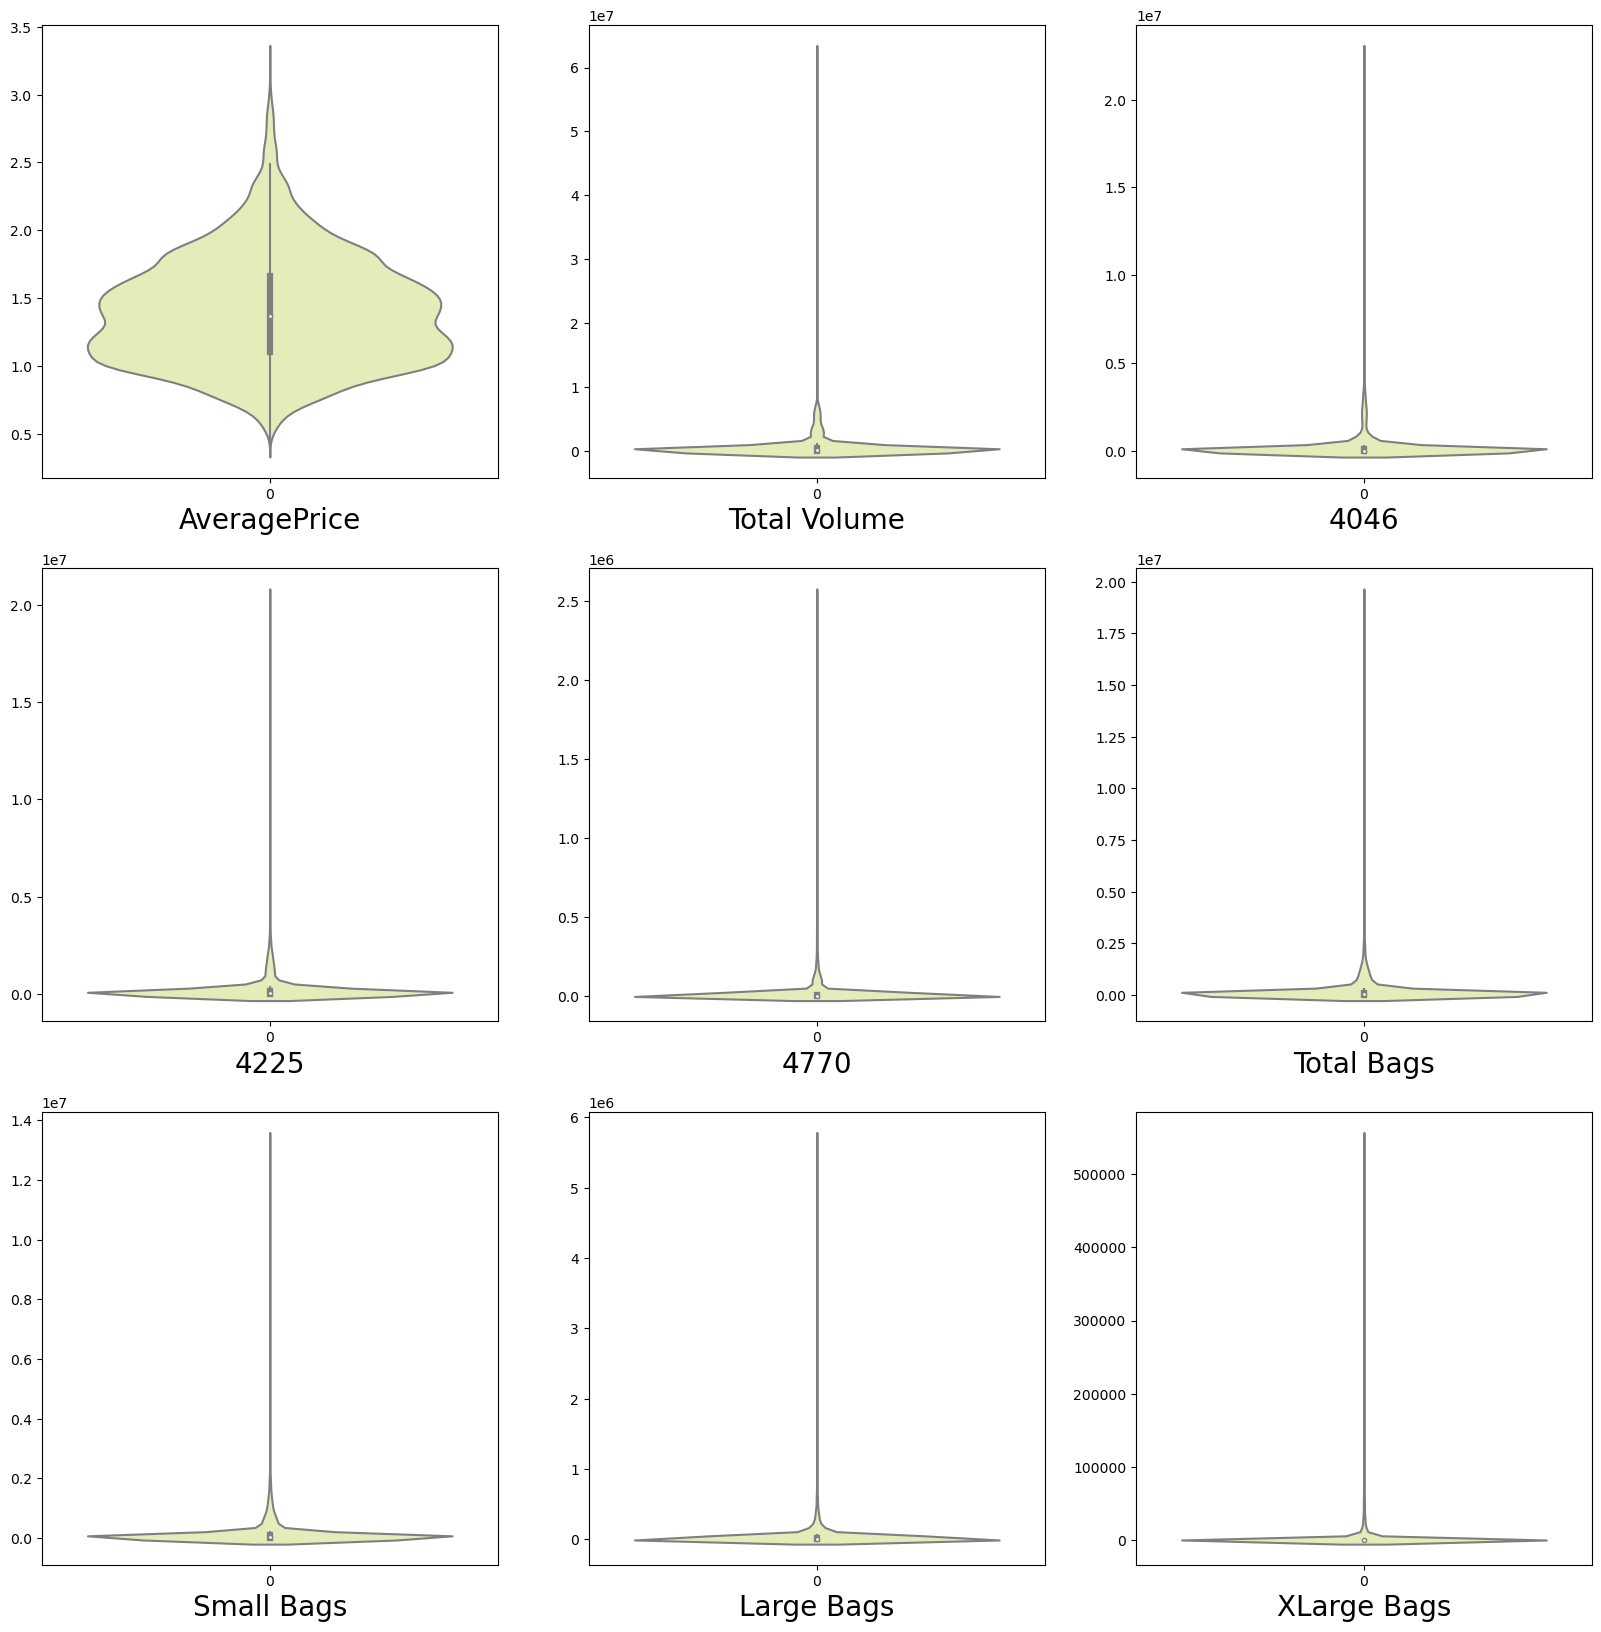

In [32]:
sns.set_palette('YlGnBu')
plt.figure(figsize=(20, 20), facecolor='white')
plotnumber = 1

for column in df2:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.violinplot(df2[column])
        plt.xlabel(column, fontsize=20)
    plotnumber += 1

plt.show()

**Average Price Distribution Comment:**
- The majority of violin plots illustrate that the average price is concentrated in the range of 1 to 1.5.
- The distributions depicted in the violin plots align with the patterns observed in the distribution plot, reinforcing the idea that most data points are centered in this particular price range.
- This consistent trend across multiple features provides further confirmation of the concentration of average prices in the specified range.
- Understanding this central tendency is crucial for grasping the common pricing patterns within the dataset, influencing subsequent analyses and decision-making processes.

In [33]:
# Seasonal Variation Analysis 
file_path = "C:/Users/Mahima/Downloads/avocado.csv.zip"
df = pd.read_csv(file_path, compression='zip')

In [34]:
df3=df.copy()

In [35]:
df3['Year'], df3['Month'], df3['Day'] = df3['Date'].str.split('-').str
df3.drop(columns=['Date','year'], inplace=True)
df3

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


In [36]:
# Converting Datetime datatypes to int
df3['Year']=df3['Year'].astype(int)
df3['Month']=df3['Month'].astype(int)
df3['Date']=df3['Day'].astype(int)

In [37]:
df3.drop(columns=['Day'],axis=1, inplace=True)

In [38]:
df3.drop(columns=['Date'],axis=1, inplace=True)

In [39]:
df3.head(5)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11


In [40]:
df3.drop(columns=['Unnamed: 0'], inplace=True)
df3

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1


In [41]:
# Univariate analysis of feature using date, months, year
df3['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

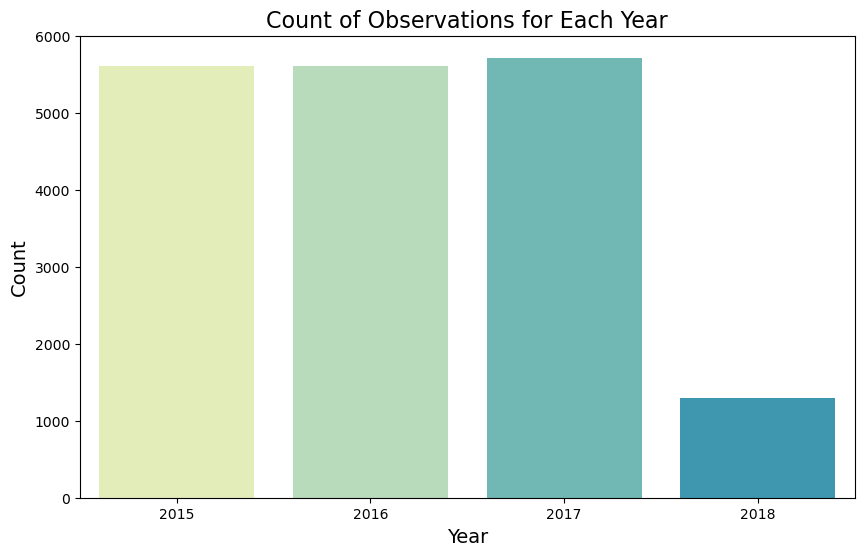

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df3)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Observations for Each Year', fontsize=16)
plt.show()

**Yearly Analysis Comment:**
- The dataset spans from 2015 to 2018, with the maximum sales entries concentrated in the year 2017, while 2018 contributes relatively fewer entries.
- To gain a comprehensive understanding of the dataset, a multi-step approach is adopted:
  - **1. Sales Entries per Month:** Initially, we aim to examine the distribution of sales entries across different months.
  - **2. Average Price Over Each Month:** Subsequently, we explore the average price variation over each month using a count plot.
  - **3. Sales Entries vs. Average Price Relation:** Lastly, we delve into the relationship between sales entries and average price over the same month to uncover potential insights.
- This structured approach enables a thorough exploration of the dataset, providing insights into sales trends, average prices, and their interplay over the specified time period.

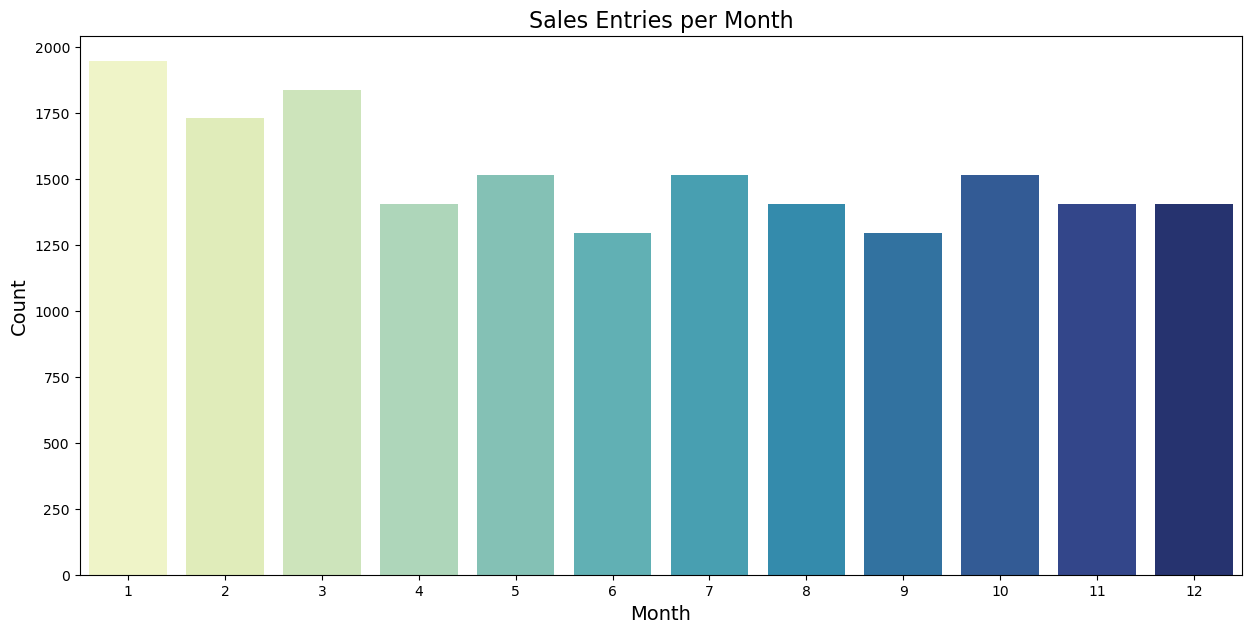

In [43]:
# 1. Sales Entries per Month
plt.figure(figsize=(15, 7))
sns.countplot(x='Month', data=df3, palette='YlGnBu')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Sales Entries per Month', fontsize=16)
plt.show()

In [44]:
df3['Month'].value_counts().max()

1944

In [45]:
df3['Month'].value_counts().min()

1294

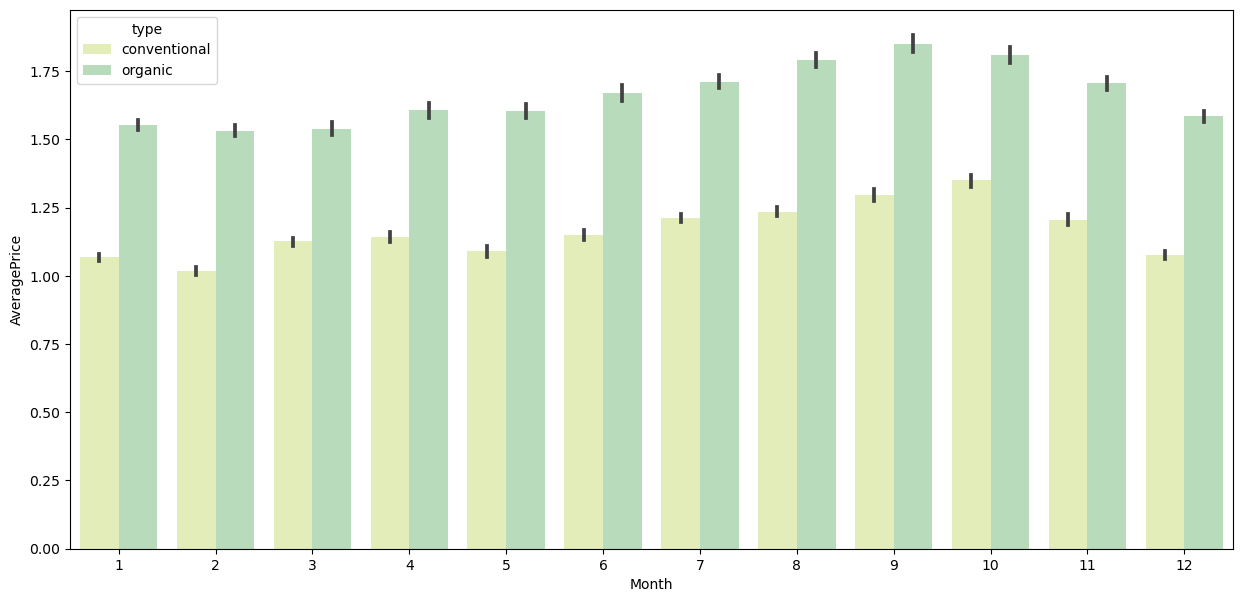

In [46]:
# Average Price Over Each Month
plt.figure(figsize=(15,7))
sns.barplot(x="Month", y="AveragePrice", hue='type', data=df3)
plt.show()

In [47]:
df3.groupby(['Month','type'])['AveragePrice'].agg([np.mean]).T

Month           1                      2                      3             \
type  conventional   organic conventional   organic conventional   organic   
mean      1.069095  1.552942     1.017315  1.531458     1.126209  1.538301   

Month           4                     5             ...           8            \
type  conventional  organic conventional   organic  ... conventional  organic   
mean       1.14235  1.60641     1.089577  1.603624  ...     1.235399  1.78963   

Month           9                      10                     11            \
type  conventional   organic conventional   organic conventional   organic   
mean      1.294738  1.850571     1.349339  1.810026     1.206054  1.705071   

Month           12            
type  conventional   organic  
mean      1.077393  1.585193  

[1 rows x 24 columns]

**Sales and Price Analysis Comment:**
- Notable insights emerge when comparing the count plot of sales entries and the bar plot of average prices monthwise:
  - **1. Price Variation in Conventional Avocado:** In September and October, the price of Conventional Avocado is comparatively higher than other months.
  - **2. Limited Variation in Organic Avocado:** For Organic Avocado, there is not a significant variation observed over the entire year.
  - **3. Flavor Influence:** Research indicates that January through March is the best time for Avocado flavor. During this period, the fruit develops higher oil content, resulting in the desired buttery flavor and texture.
  - **4. Price vs. Sales Trends:** Comparing the count plot of sales entries and the bar plot of average prices monthwise reveals interesting trends:
    - **- Aug to Oct:** Prices are high, and sales orders are minimum.
    - **- Jan to Mar:** Prices are relatively lower, and sales orders show an increase.
  - **5. Contrast in Conventional Avocado:** This trend is more prominent in Conventional Avocado, where customers appear less inclined to buy at higher prices.
  - **6. Organic Avocado:** In contrast, there is no clear relationship between price and sales in the case of Organic Avocado.
- In summary, the analysis highlights a consumer preference for Avocados with lower prices, especially in the first quarter, aligning with the peak flavor season.

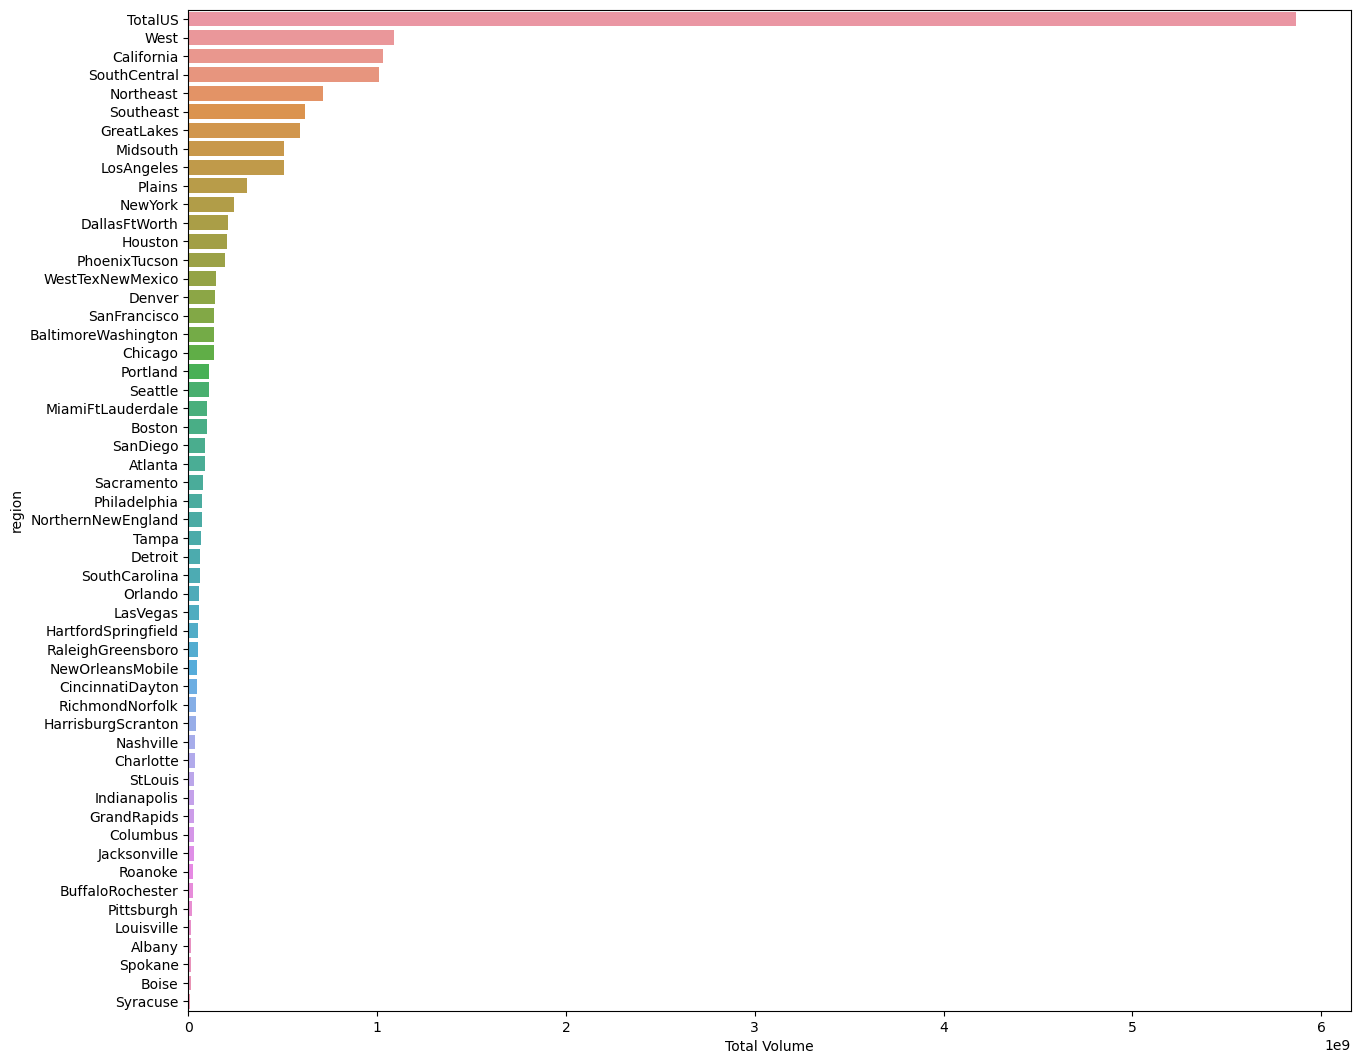

In [48]:
# Average price according to region
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df)
plt.show()

In [49]:
df.groupby(['region'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([np.mean])

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags
,mean,mean,mean,mean,mean
region,,,,,
Albany,4.753787e+04,7.929747e+03,6.647765e+03,1.153496e+03,128.488639
Atlanta,2.621453e+05,8.449856e+04,5.160573e+04,3.207004e+04,822.786036
BaltimoreWashington,3.985619e+05,1.044561e+05,1.009397e+05,2.903985e+03,612.382722
Boise,4.264257e+04,1.597459e+04,1.384004e+04,2.103634e+03,30.915207
Boston,2.877929e+05,6.359609e+04,5.890659e+04,4.438365e+03,251.124231
BuffaloRochester,6.793630e+04,3.435134e+04,3.037998e+04,3.729050e+03,242.313432
California,3.044324e+06,7.298290e+05,6.778038e+05,3.642585e+04,15599.342929
Charlotte,1.051939e+05,3.460930e+04,3.149069e+04,2.912684e+03,205.927781


**Region Analysis Comment:**
- The 'Region' feature provides valuable insights into the distribution of sales volume and average prices across different regions:
  - **1. Sales Volume Variation:**
    - **- Maximum Sales Volume:** South Central region records the highest sales volume, indicating a significant demand for avocados in that area.
    - **- Minimum Sales Volume:** Syracuse reports the minimum sales volume, suggesting comparatively lower demand in that region.
  - **2. Average Price Variation:**
    - **- Maximum Average Price:** San Francisco stands out with the highest average sale price, reflecting potentially higher demand for premium avocados in this region.
    - **- Minimum Average Price:** Houston reports the lowest average sale price, suggesting a more competitive market with lower-priced avocados.
- These regional variations in both sales volume and average prices highlight the diverse preferences and market dynamics present across different areas. Understanding these regional differences is crucial for targeted marketing strategies and supply chain management.

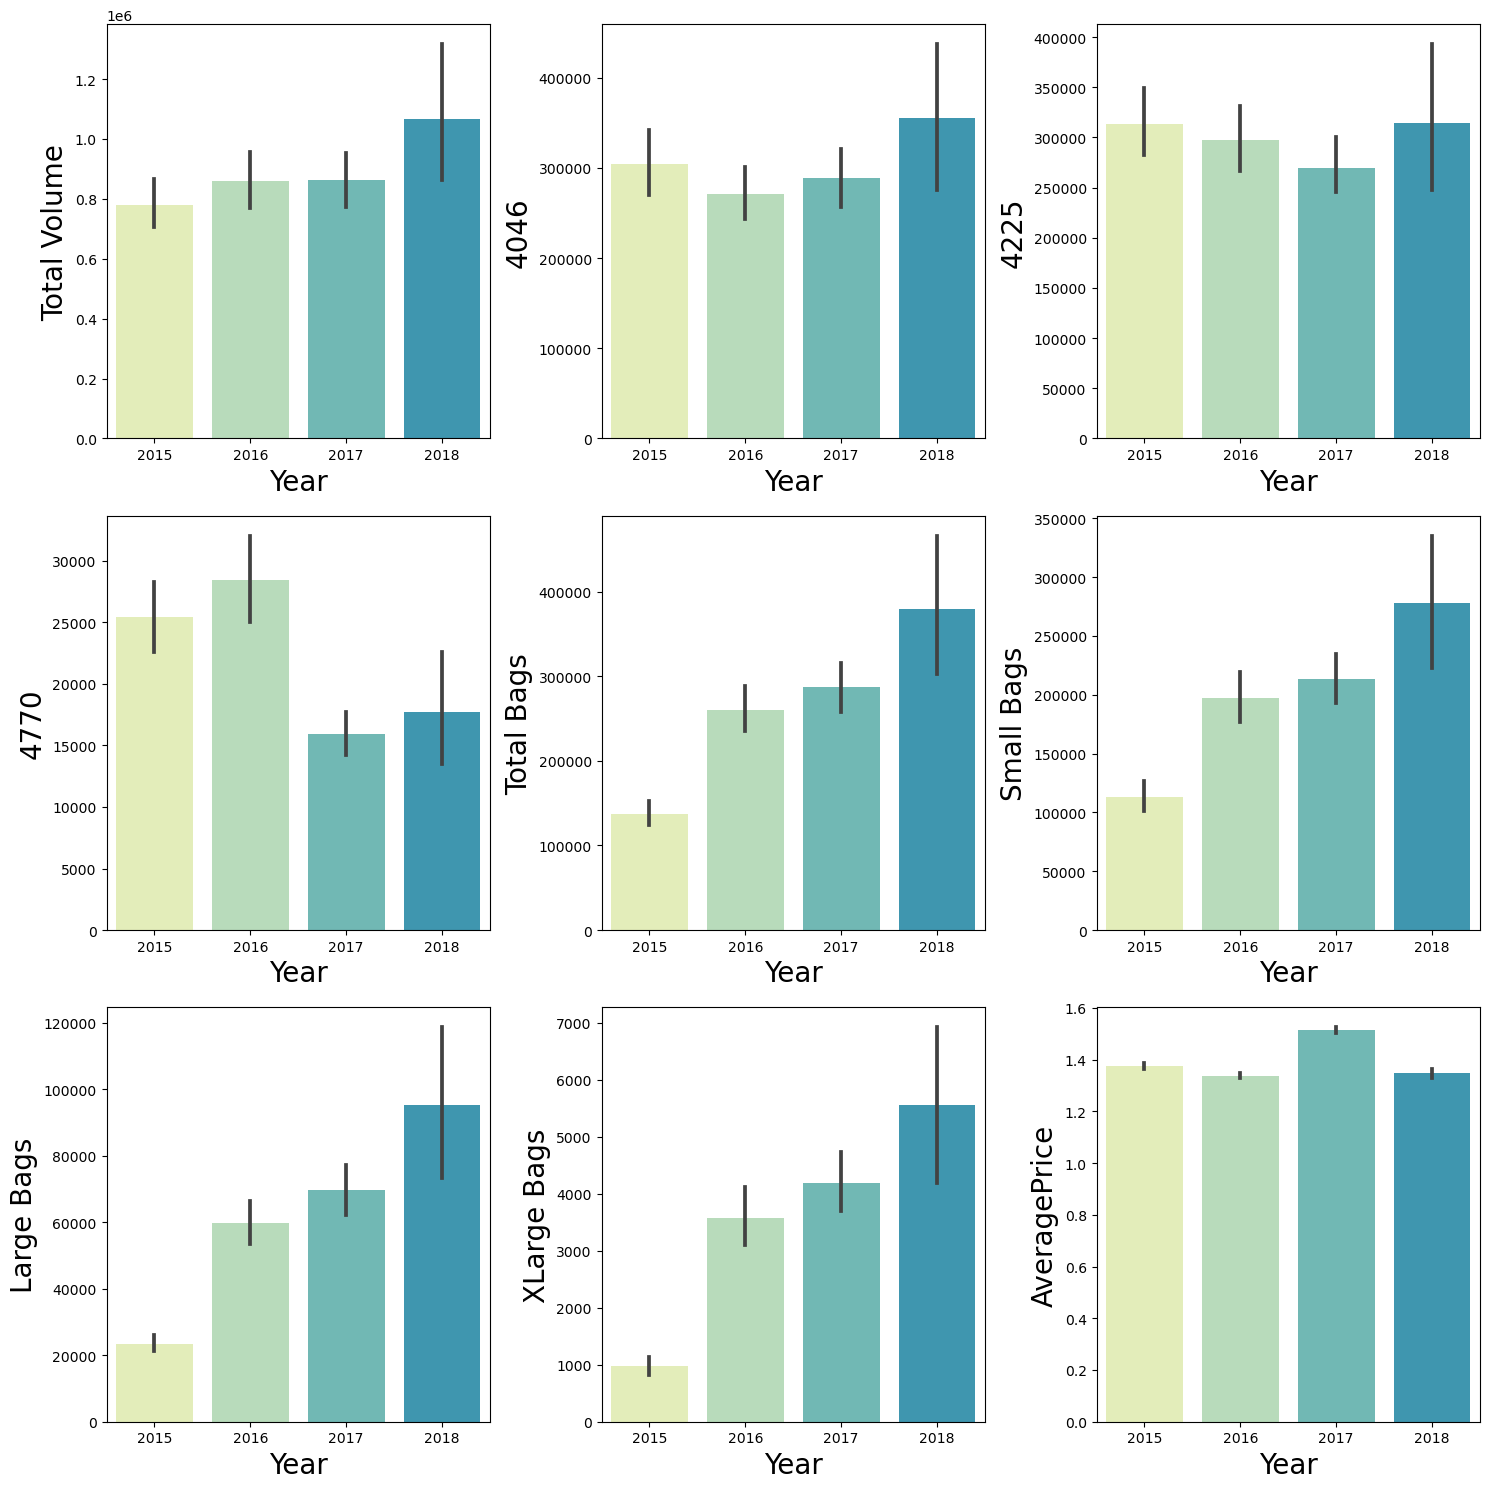

In [50]:
cols = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'AveragePrice']

plt.figure(figsize=(15, 15))
plotnumber = 1

for col in cols:
    if plotnumber <= 9:
        plt.subplot(3, 3, plotnumber)
        sns.barplot(x='Year', y=col, data=df3)
        plt.xlabel('Year', fontsize=20)
        plt.ylabel(col, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

**Production and Sales Analysis Comment:**
- **PLU 4046 Production Growth:** Over the 4-year period, the production of PLU 4046 has consistently grown and is now greater than the production of PLU 4225 and PLU 4770. PLU 4770 is the least produced among the three.
- **Bag Sales Growth:** The sale of all three types of bags (Small Bags, Large Bags, and XLarge Bags) has shown growth over the years, indicating a consistent demand for avocados in various packaging options.
- **Bag Preference:** The majority of customers prefer buying Small Bags over Large and XLarge bags, suggesting a preference for smaller quantities or more budget-friendly options.
- **XLarge Bags Market Niche:** There appears to be a narrow customer segment willing to buy XLarge bags, possibly driven by the need for larger quantities, despite the associated higher price.
- **Regional Price Analysis:** The average price of avocados is notably high in the region of San Francisco, followed by RaleighGreensboro, particularly in the year 2017. This suggests a combination of high demand and premium pricing in these regions during that period.
- **Year 2017 Demand and Price:** The year 2017 stands out with high demand for avocados, reflected in increased production and sales. This demand is accompanied by higher average prices, indicating potential market dynamics and consumer preferences during that specific year.

In [51]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['region']=le.fit_transform(df3['region'])
df3['type']=le.fit_transform(df3['type'])
df3.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11


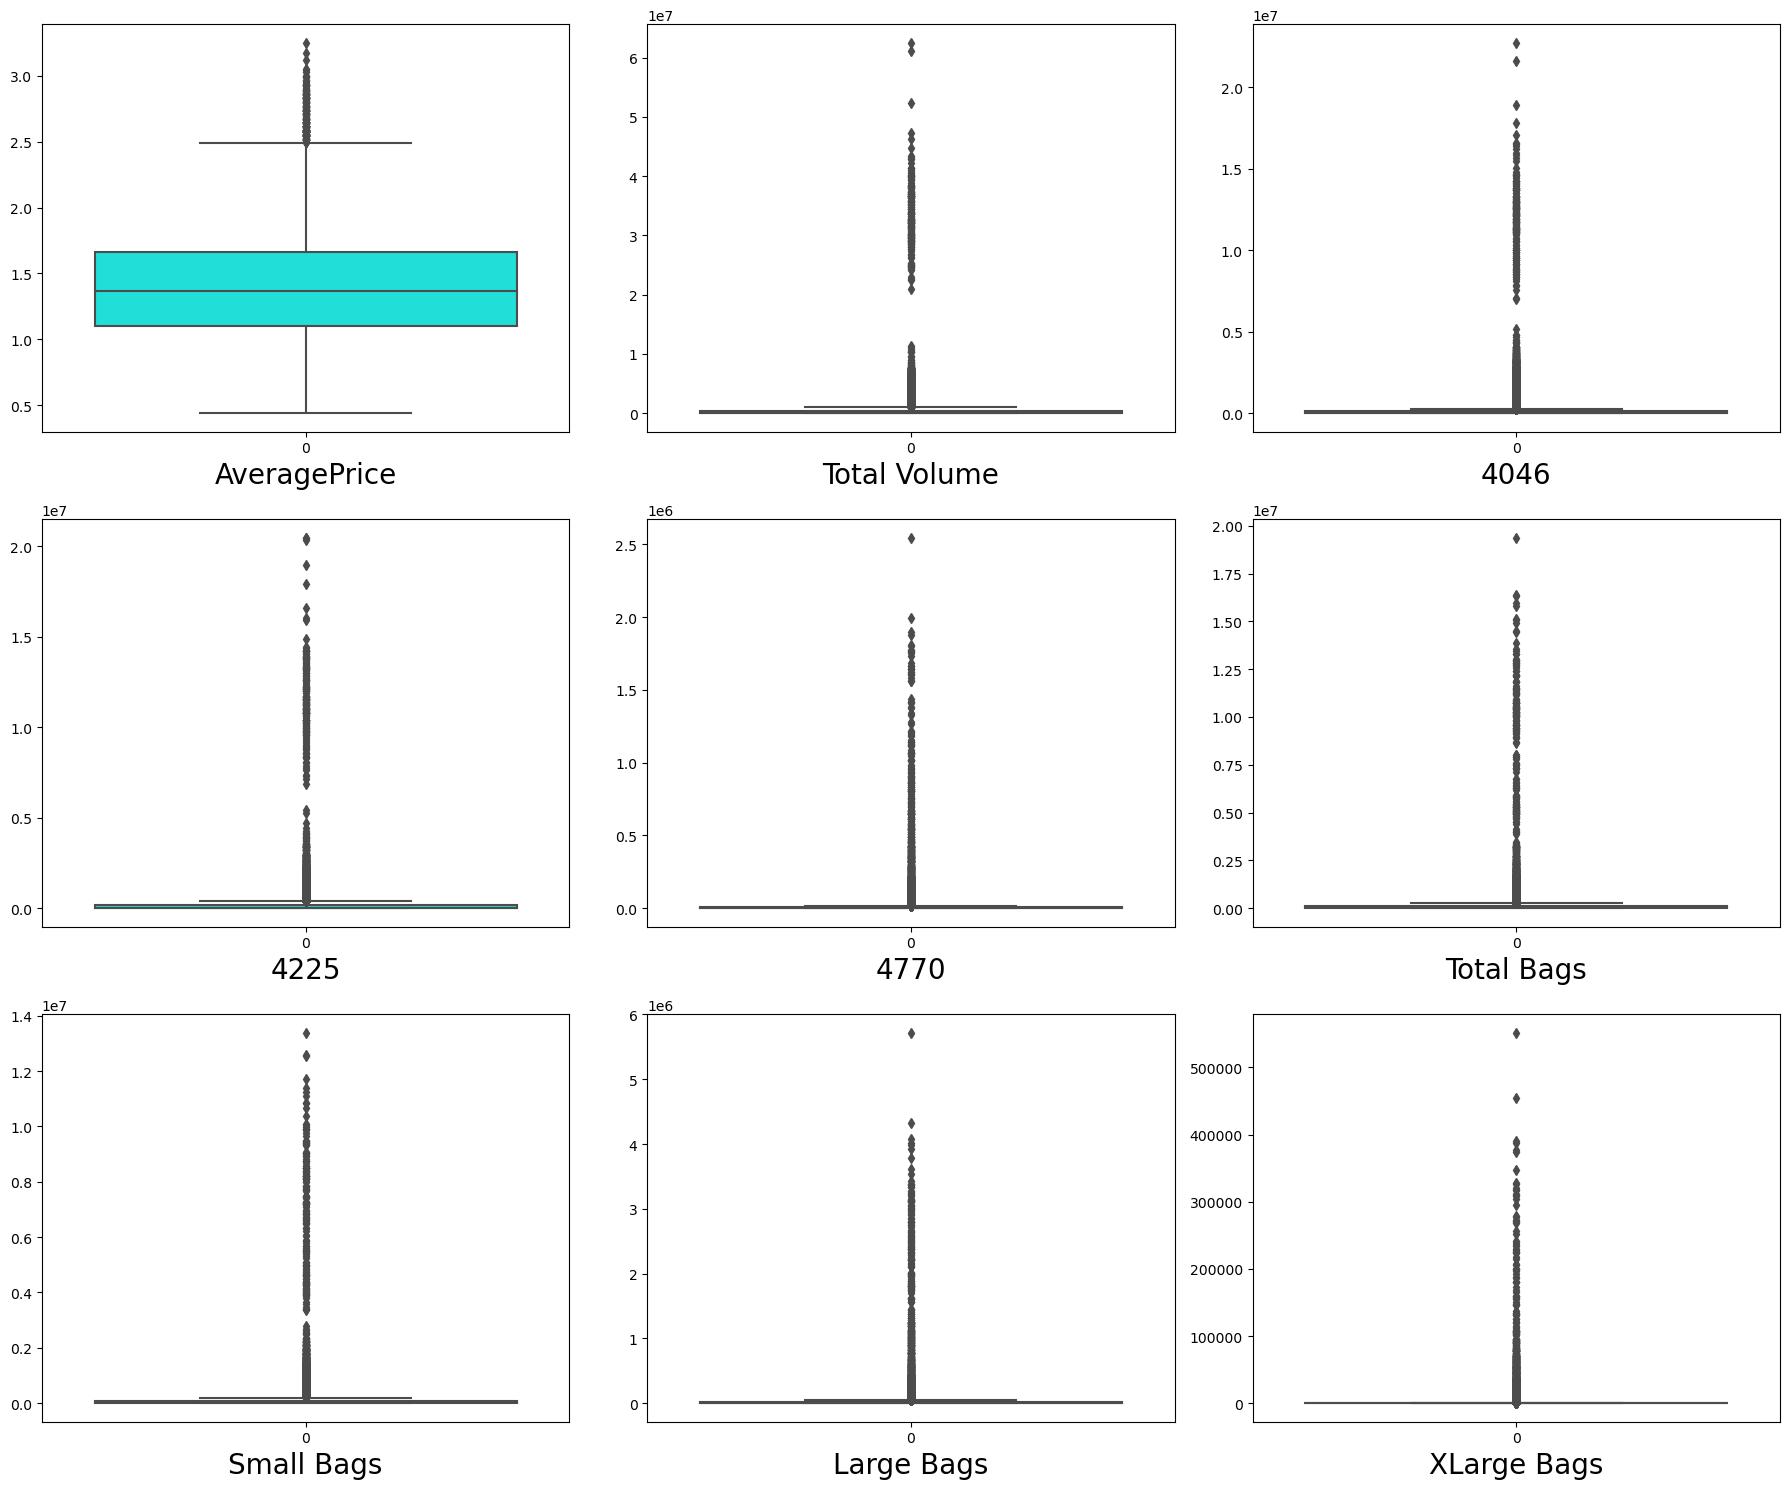

In [52]:
# Outliers Detection and Removal
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df2[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [53]:
from scipy.stats import zscore
z = np.abs(zscore(df3))
threshold = 3
df4 = df3[(z<3).all(axis = 1)]

In [54]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df4.shape)

Shape of dataset after removing outliers : (17651, 13)


In [55]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((18249-17651)/18249)*100,'%')

Percentage Data Loss : 3.276891884486821 %


In [56]:
# Corrleation
df4.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
AveragePrice,1.000000,-0.332056,-0.333577,-0.243988,-0.243465,-0.297323,-0.275771,-0.270915,-0.152669,0.613150,-0.003242,0.091704,0.149502
Total Volume,-0.332056,1.000000,0.876307,0.871592,0.647518,0.912184,0.905648,0.640642,0.513741,-0.415476,0.076676,-0.004866,-0.018645
4046,-0.333577,0.876307,1.000000,0.565118,0.492127,0.727981,0.706800,0.561060,0.415432,-0.341376,0.119067,-0.034636,-0.015797
4225,-0.243988,0.871592,0.565118,1.000000,0.620221,0.757786,0.778761,0.451711,0.392030,-0.383138,0.011002,-0.040234,-0.019844
4770,-0.243465,0.647518,0.492127,0.620221,1.000000,0.557980,0.571512,0.323747,0.495976,-0.321809,-0.095972,-0.082054,-0.027245
Total Bags,-0.297323,0.912184,0.727981,0.757786,0.557980,1.000000,0.978213,0.746946,0.581690,-0.378205,0.085892,0.103442,-0.010916
Small Bags,-0.275771,0.905648,0.706800,0.778761,0.571512,0.978213,1.000000,0.593155,0.597700,-0.367593,0.065976,0.086639,-0.013018
Large Bags,-0.270915,0.640642,0.561060,0.451711,0.323747,0.746946,0.593155,1.000000,0.296864,-0.286813,0.127635,0.119543,-0.001457
XLarge Bags,-0.152669,0.513741,0.415432,0.392030,0.495976,0.581690,0.597700,0.296864,1.000000,-0.263734,-0.044338,0.108209,0.002843
type,0.613150,-0.415476,-0.341376,-0.383138,-0.321809,-0.378205,-0.367593,-0.286813,-0.263734,1.000000,0.018409,0.003867,-0.009499


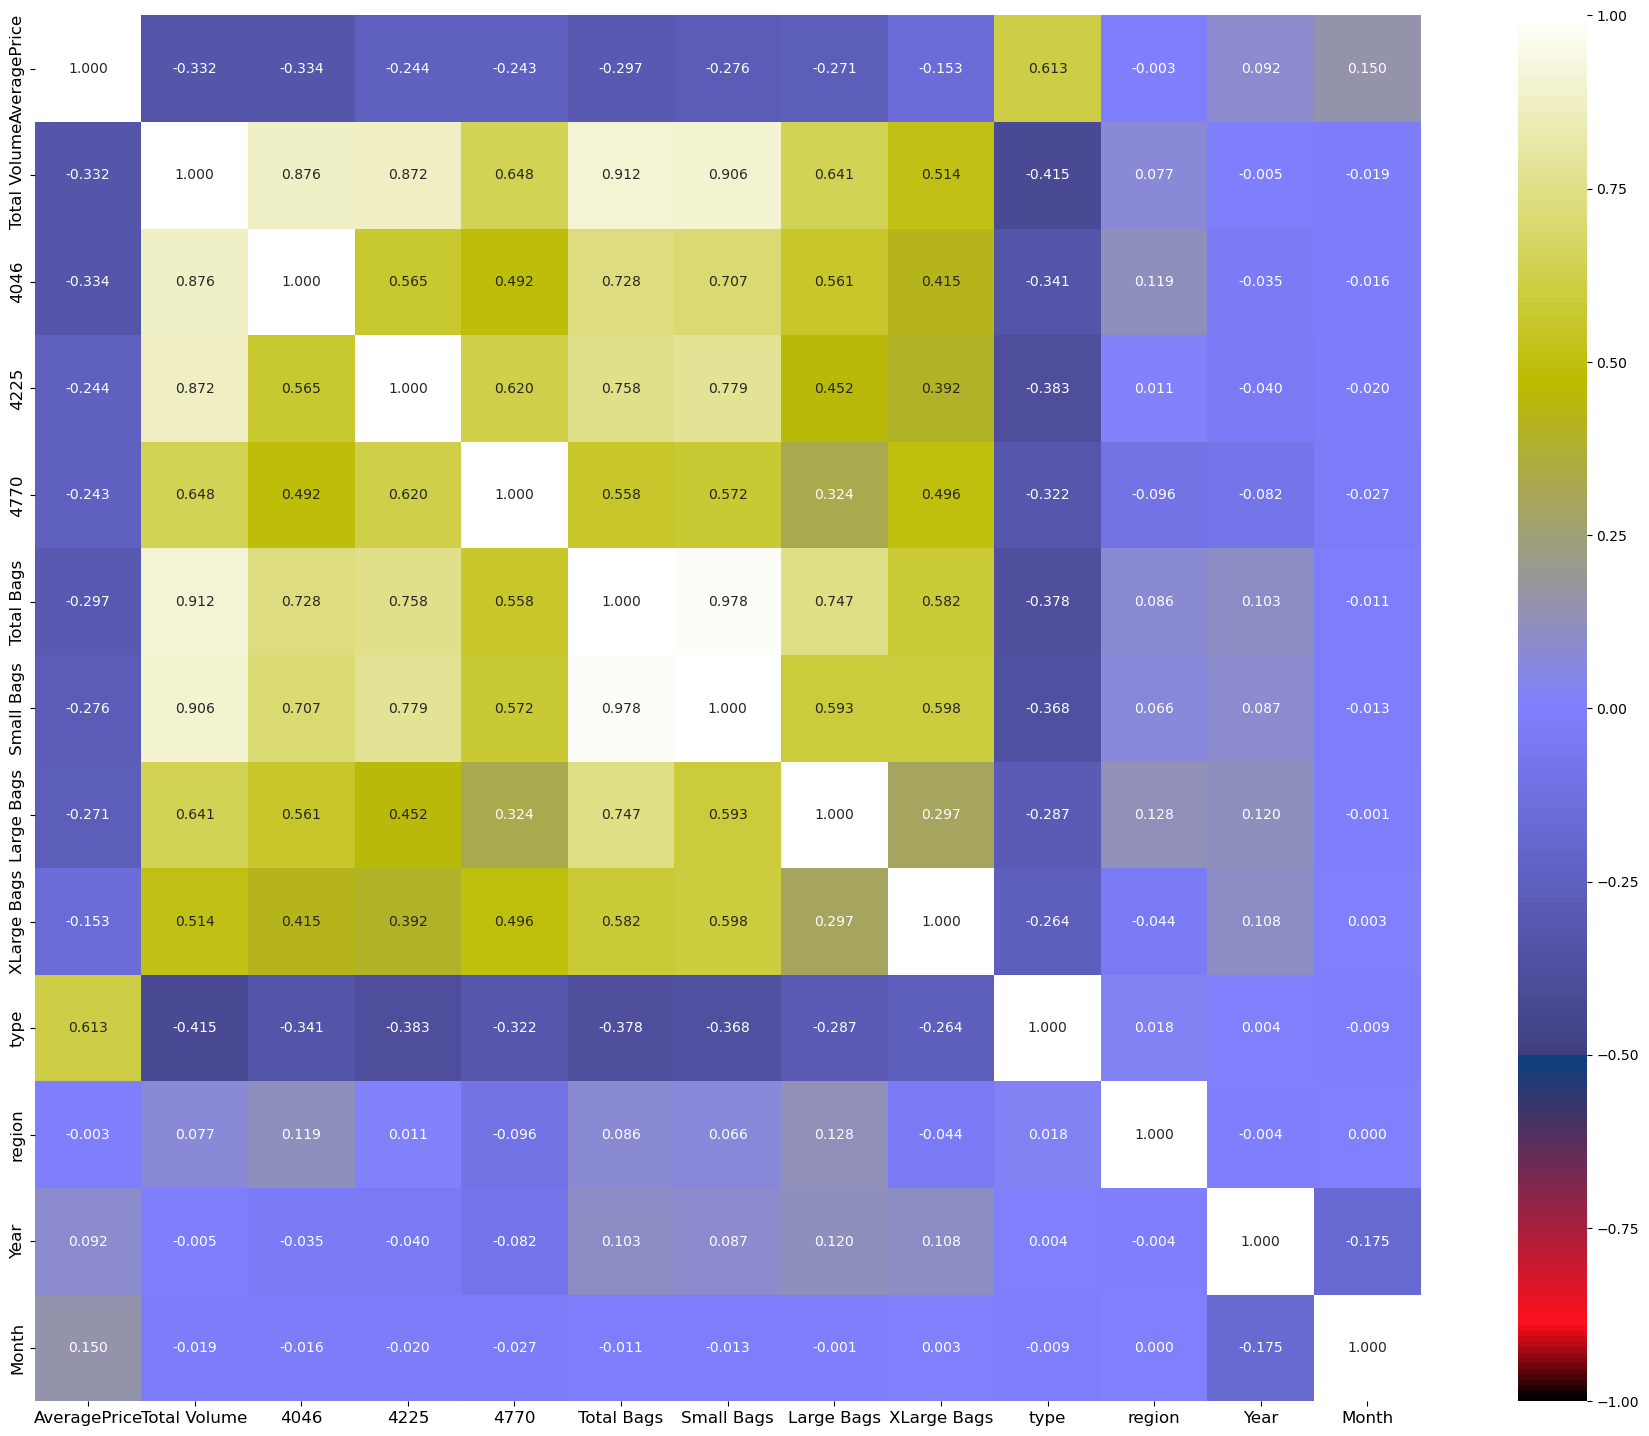

In [57]:
plt.figure(figsize=(25,18))
sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

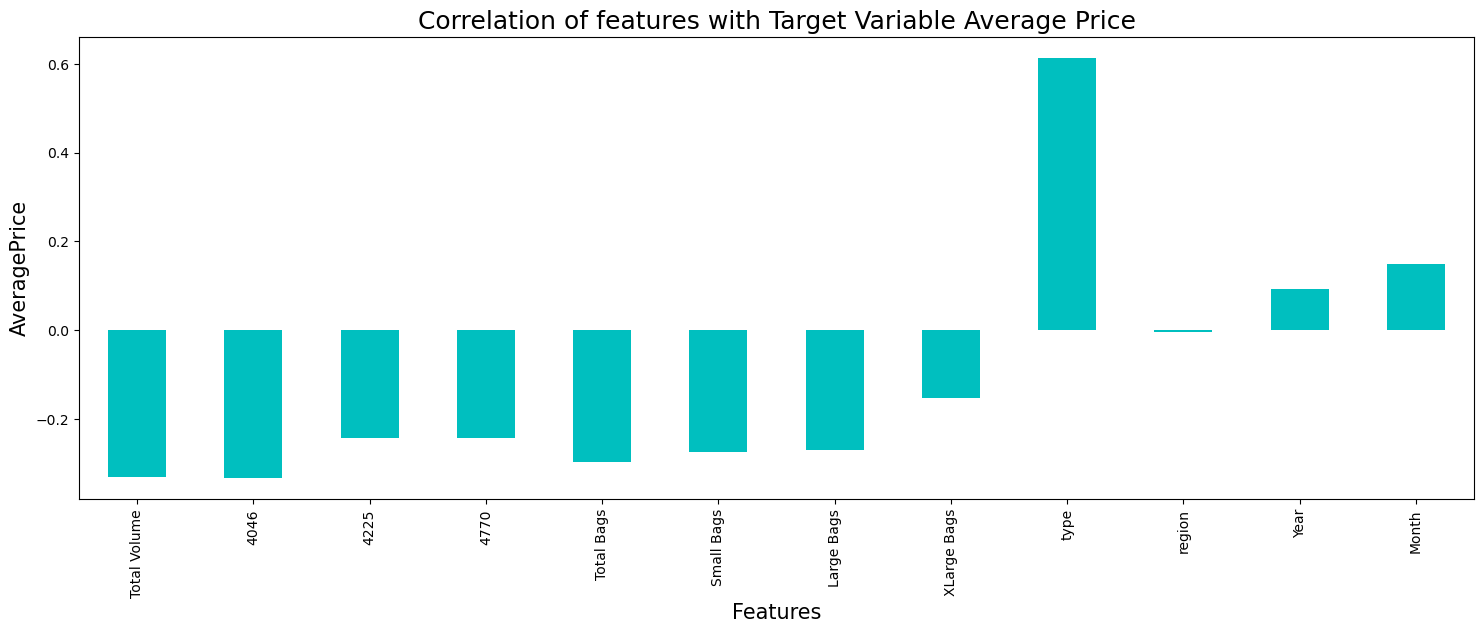

In [58]:
plt.figure(figsize = (18,6))
df4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

**Feature Correlation and Selection Comment:**
- **Correlation Analysis:**
  - Almost all features show a highly negative correlation with the target variable, while only 'type,' 'year,' and 'month' exhibit positive correlations.
  - 'Small Bags' exhibit a highly positive correlation (correlation coefficient 0.978) with 'Total Bags,' which is expected, as the majority of bags are small.
  - 'Total Volume' is highly correlated with '4046,' suggesting a strong relationship between the total volume of avocados and a specific grade ('4046').
- **Feature Removal Strategy:**
  - We are planning to remove certain columns that are not required for further analysis.
  - '4046,' '4225,' and '4770' exhibit multicollinearity with 'Total Volume.' Since these features represent the total avocados sold under particular grades, and we lack individual price data for each grade, they don't contribute meaningful information to the ML model and will be dropped.
  - Similarly, 'Total Bags' will be dropped as it is the sum of all other bag types, and we aim to keep individual bag count features.
  - The 'region' feature will also be dropped due to its low correlation with other features.
- This feature selection strategy aims to streamline the dataset for better model interpretability and performance in subsequent machine learning analyses.

In [59]:
df4.drop(columns=['4046','4225','4770','region','Total Bags'],axis=1, inplace=True)

In [60]:
# Checking Multicollinearity between features using variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df4.values,i) for i in range(df4.shape[1])]
vif['Features']= df4.columns
vif

,VIF,Features
0,24.367038,AveragePrice
1,7.754106,Total Volume
2,7.707277,Small Bags
3,1.970395,Large Bags
4,1.693456,XLarge Bags
5,3.643636,type
6,19.857116,Year
7,4.212261,Month


**Multicollinearity Mitigation Strategy Comment:**
- **Multicollinearity Challenge:**
  - The dataset exhibits multicollinearity, where many independent features are correlated with each other to varying degrees, either moderately or poorly.
- **Mitigation Strategy:**
  - **1. Traditional Approach:** Initially, the strategy involves removing some highly correlated features. However, this approach may not be effective here, as most input features show correlations with each other, either moderate or poor.
  - **2. Alternative Approach - Scaling and PCA:** Given the challenges with the traditional approach, an alternative method involves scaling the data and then applying Principal Component Analysis (PCA).
- **VIF Analysis:**
  - For independent features, the Variance Inflation Factor (VIF) is within the acceptable limit of 10, except for 'year.'
  - 'Year' is less than 20% correlated with the target feature, and most input features are correlated with it less than 10%.
- **Mitigation Decision:**
  - Considering the VIF analysis and correlation insights, the decision is to drop the 'Year' feature. This step aims to address multicollinearity and prepare the data for further investigation.
- **Conclusion:**
  - The chosen strategy aligns with the goal of managing multicollinearity, ensuring that the dataset is appropriately preprocessed for subsequent analyses.

In [61]:
df4.drop(columns=['Year'],axis=1, inplace=True)

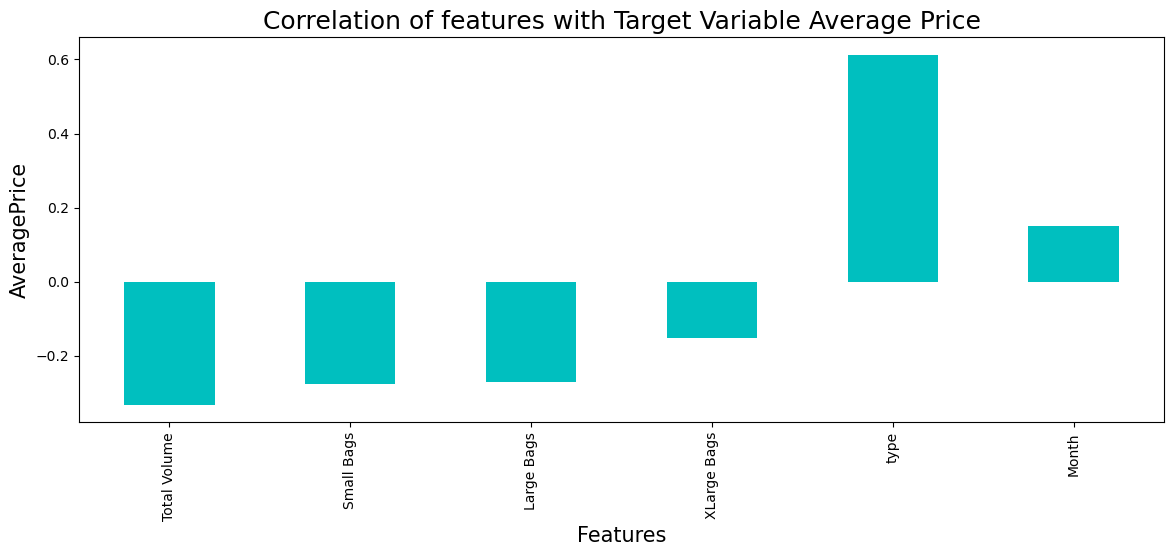

In [62]:
# Checking correlation with target variable after removal of multicollinearity
plt.figure(figsize = (14,5))
df4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

In [63]:
# Skewness of features
df4.skew()

AveragePrice    0.377432
Total Volume    3.767138
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
Month           0.107408
dtype: float64

In [64]:
# Transforming skewness through log transform
for col in df4.columns:
    if df4.skew().loc[col]>0.55:
        df4[col]=np.log1p(df4[col])

In [65]:
# Standard Scaling
X = df4.drop('AveragePrice', axis=1)
Y = df4['AveragePrice']

In [66]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## Machine Learning Model Building

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (11826, 6)
Training target vector size: (11826,)
Test feature matrix size: (5825, 6)
Test target vector size: (5825,)


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.46995615775000343 on Random_state 557


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [1.0918524  1.234798   1.60179338 ... 1.70481371 1.6431685  1.6354547 ]


Actual Wins:
 8841     1.35
859      1.19
17369    2.09
11190    1.05
14051    2.03
         ... 
5452     1.05
3489     1.35
14534    1.22
11925    1.71
11077    1.83
Name: AveragePrice, Length: 5825, dtype: float64


In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.22390630602712788
Mean squared error : 0.08082880539614365
Root Mean Squared Error: 0.2843040720709847


 R2 Score :
0.46995615775000343


In [72]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : -0.013708960907187939


In [73]:
#Applying other Regression Model, Evaluation & Crossvalidation
rf = RandomForestRegressor(n_estimators = 70 ,max_depth=25)
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor(max_depth=25,learning_rate=0.1)
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('='*100)



 Error of  RandomForestRegressor(max_depth=25, n_estimators=70) :
Mean absolute error : 0.1612095781406214
Mean squared error : 0.048026565309305914
Root Mean Squared Error: 0.21914964136248527


 R2 Score :
0.685060479591977


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 0.223906315963508
Mean squared error : 0.08082881097903072
Root Mean Squared Error: 0.28430408188949857


 R2 Score :
0.4699561211396033


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.210456652360515
Mean squared error : 0.09207709871244633
Root Mean Squared Error: 0.3034420846099735


 R2 Score :
0.39619422870864607


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 0.22071934419892306
Mean squared error : 0.07680290773749468
Root Mean Squared Error: 0.27713337535831856


 R2 Score :
0.49635642746866704


 Error of  GradientBoostingRegressor(max_depth=25) :
Mean absolute error : 0.20404203243503713
Mean squared error : 0.08677027490537001
Root Mean Squared Error: 0.294

In [74]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('='*100)



Cross Validation Score : RandomForestRegressor(max_depth=25, n_estimators=70) :

Mean CV Score : -0.18495300932682193


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : -0.013709058462113987


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.8469079655023549


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : -0.02849635443717329


Cross Validation Score : GradientBoostingRegressor(max_depth=25) :

Mean CV Score : -0.7701912699795778


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_one

In [79]:
# Importing necessary library
from sklearn.ensemble import RandomForestRegressor

# Creating the final model
Final_mod = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=20, 
                                  max_features='sqrt', min_samples_leaf=5, min_samples_split=10)

# Training the model on the training data
Final_mod.fit(X_train, Y_train)

# Making predictions on the test data
y_pred = Final_mod.predict(X_test)

# Printing the evaluation metrics for the final model
print('\n')
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error:', mean_absolute_error(Y_test, y_pred))
print('Mean squared error:', mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test, y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error: 0.17364825941081577
Mean squared error: 0.05185543725393648
Root Mean Squared Error: 0.22771788962208586


 R2 Score of Final Model :
0.6599522278113311




 True Values Vs Predicted Value plot :


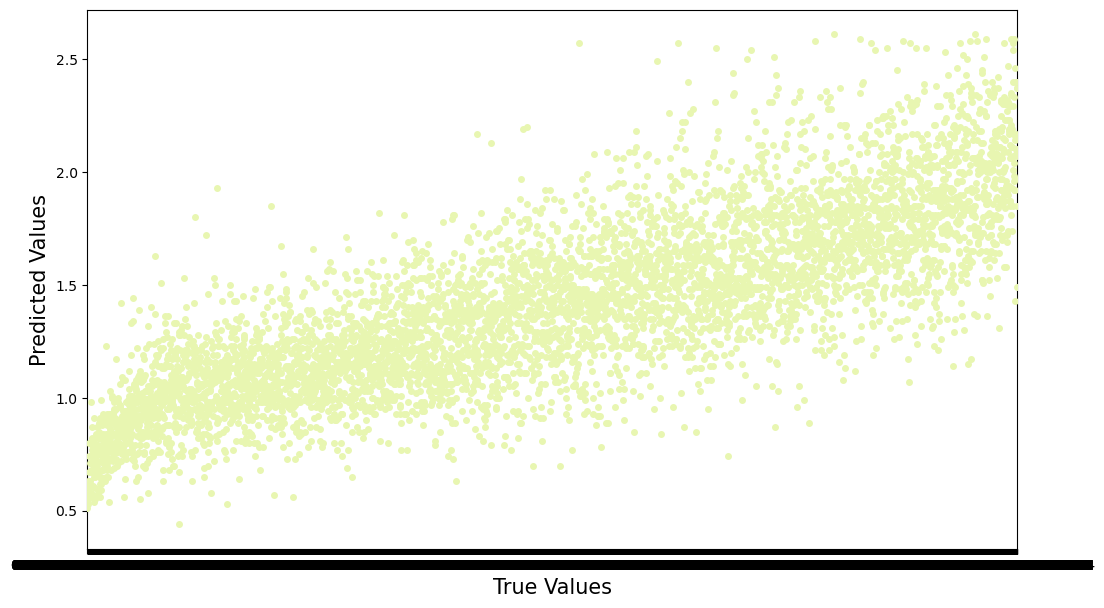

In [81]:
plt.figure(figsize=(12, 7))
sns.swarmplot(y=Y_test.round(2), x=y_pred)
print('\033[1m' + ' True Values Vs Predicted Value plot :' + '\033[0m')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.show()

In [83]:
#Saving model
import joblib
joblib.dump(Final_mod,'Avacado_Final.pkl')

['Avacado_Final.pkl']